In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
from scipy.optimize import curve_fit
from scipy.stats import normaltest

In [58]:
alpha = 0.95

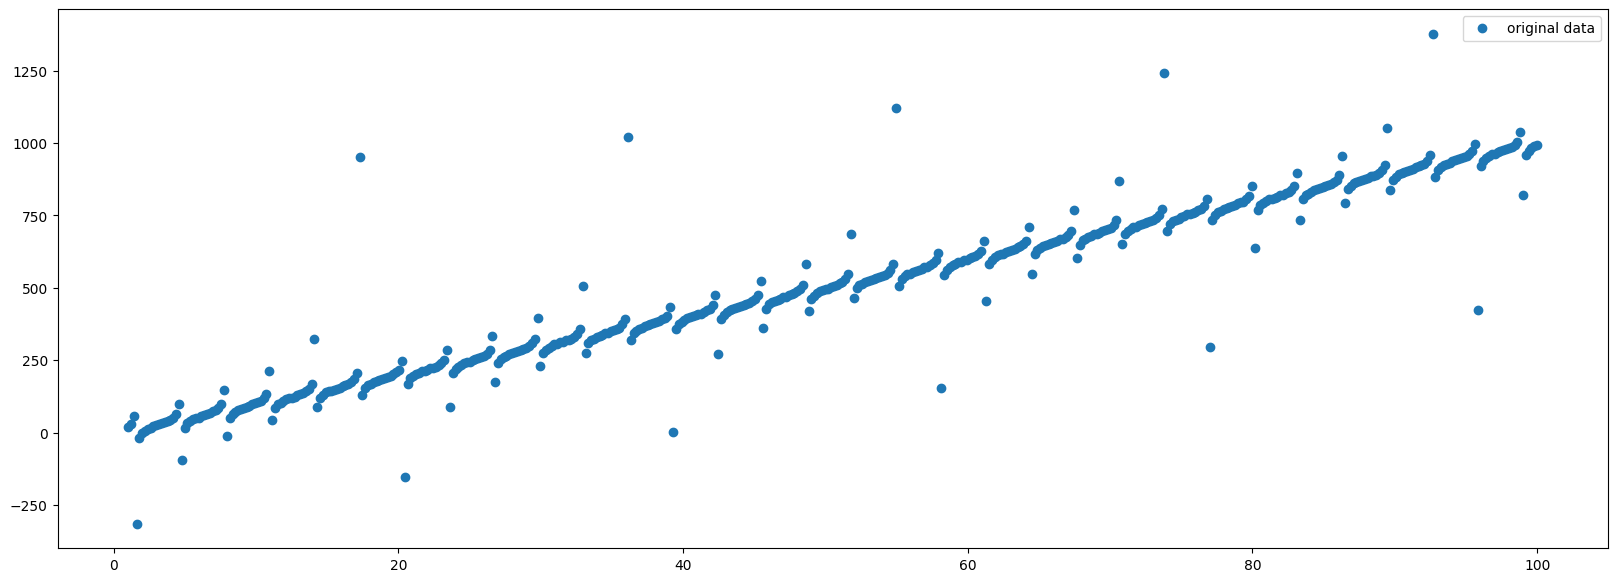

In [59]:
x = np.load('x.npy')
y = np.load('y.npy')

plt.figure(figsize=(20, 7))
plt.plot(x, y, 'o', label='original data')
plt.legend()

Определим модель и подгоним коэффициенты

In [60]:
def func(x: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    return a * x + b * np.tan(x) + c


params, cov = curve_fit(func, xdata=x, ydata=y)

Нарисуем график полученной функции и визуально определим адеквыатность модели.

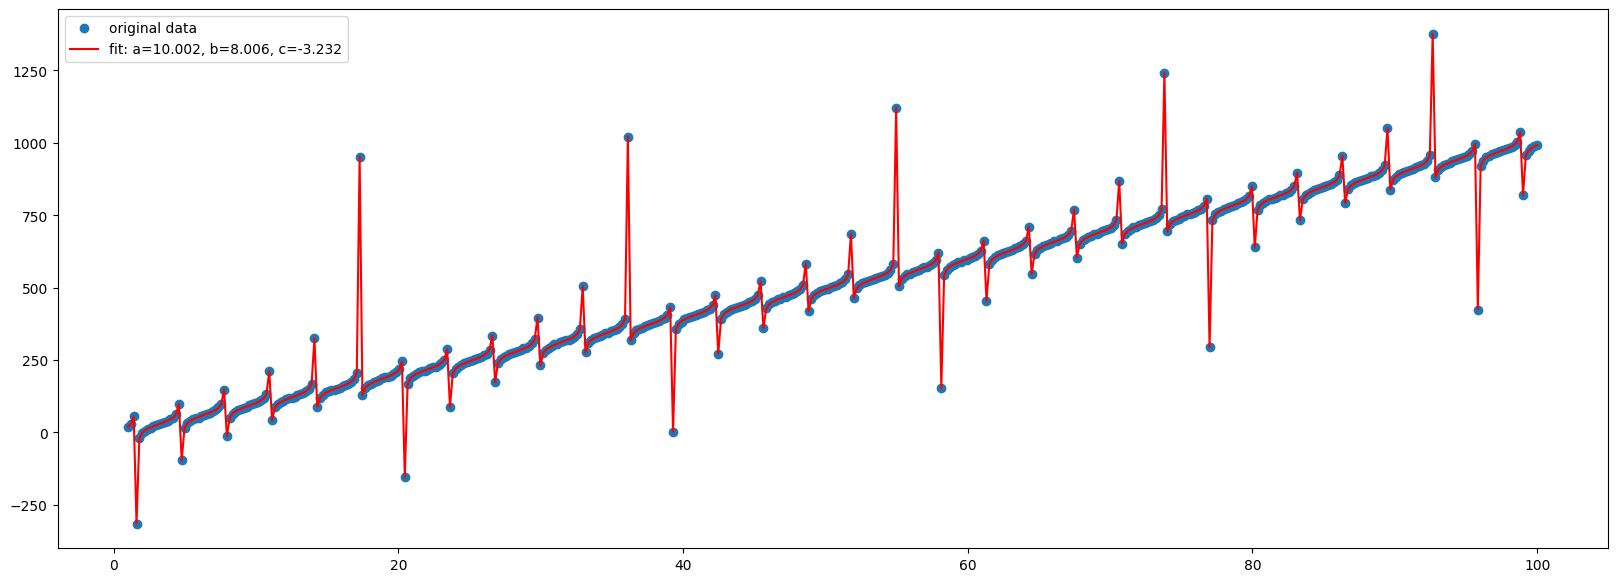

In [61]:
plt.figure(figsize=(20, 7))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, func(x, *params), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params))
plt.legend()
plt.show()

Как видно, модель достаточно неплохо подходит для описания данных. Теперь выведем остатки

<Axes: ylabel='Density'>

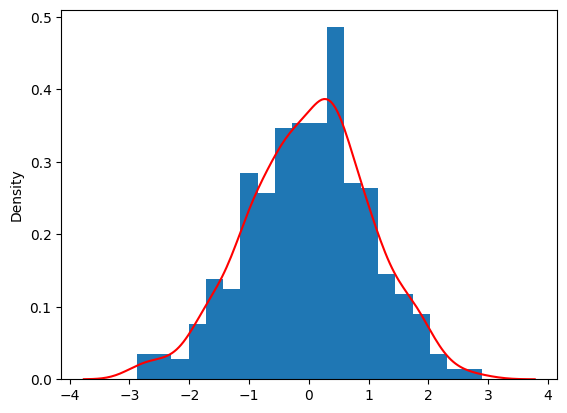

In [62]:
r = y - func(x, *params)
plt.hist(r, density=True, bins=20)
sns.kdeplot(r, color='r')

Text(0, 0.5, 'Actual values')

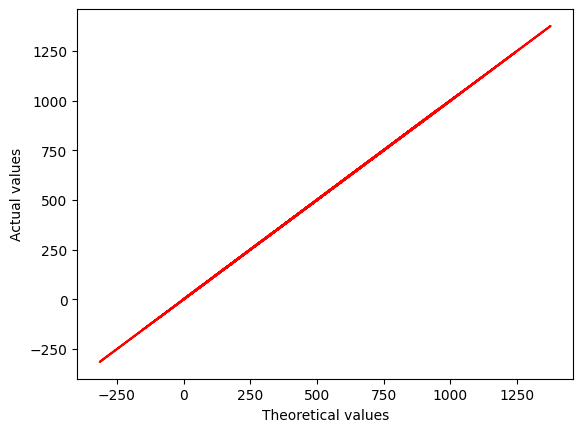

In [63]:
plt.plot(y, func(x, *params), color='r')
plt.xlabel("Theoretical values")
plt.ylabel("Actual values")

In [64]:
statistic, pvalue = normaltest(r)
print(f'{statistic}, {pvalue}')

1.9282637485372465, 0.3813140846623304


Выводы
Построена аппроксимирующая функция

$y(x) = ax + b\tan(cx)$

с параметрами

$a = 10$

$b = 8$

$c = -3.23$

Проведен тест scipy.normaltest (основанный на критерии $\Chi^2$ и критерии Д'Агостино) на нормальность остатков с гипотезой:

$H_0$: остатки распределены нормально

$H_1$: распределение остатков не является нормальным

При применении теста на значениях остатков получено:

p-value = 0.381

Значение статистики $s^2 + k^2$ = 1.928, где первое - значение статистики $\Chi^2$, а второе - значение статистики $Y$ в критерии Д'Агостино

Следовательно, при уровне значимости $\alpha = 0.05$, гипотеза принимается и модель является адекватной